<h1><center>Bike Sharing - BoomBike</center></h1>

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [6]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null values

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping Instant because its just an index and it doesnt help us in our investigation.

### Dropping dteday as we have other depicting months and days of the week,, and we dont need the day for our investigation

In [9]:
#Dropping instant and dteday
df=df.drop(['instant','dteday'],axis=1)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Mapping the categorical variables for better understanding and categorizing them in common terms for easier handling

In [11]:
# mapping categorical variables 
df['weekday']=df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth']=df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weathersit']=df['weathersit'].map({1:'clear', 2:'mist',3:'drizzle'})

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


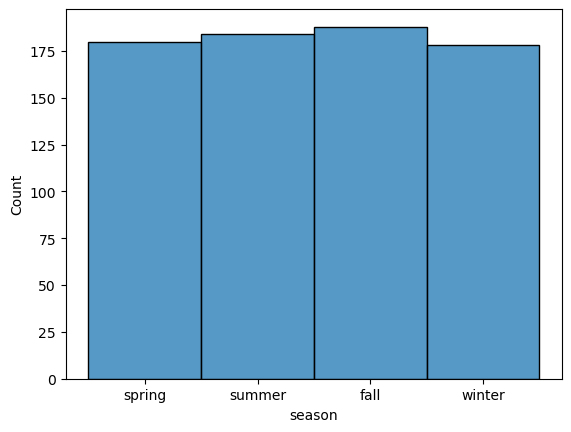

In [13]:
sns.histplot(df.season)
plt.show()

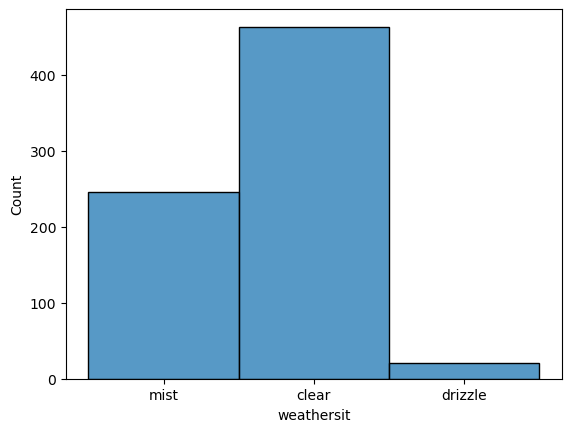

In [14]:
sns.histplot(df.weathersit)
plt.show()

#### It is clear from the above plot that the weather is mostly clear and misty throughout the year

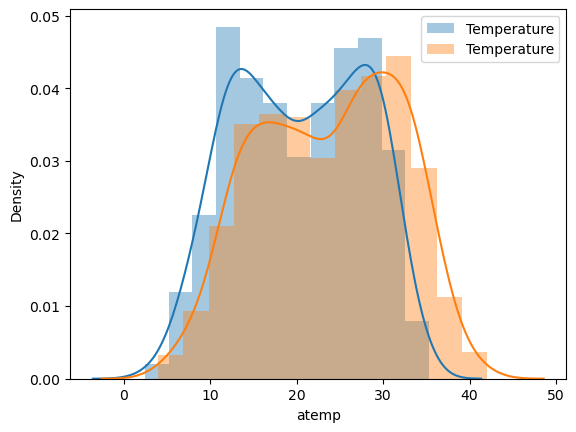

In [15]:
sns.distplot(df.temp, kde=True, label='Temperature')
sns.distplot(df.atemp, kde=True, label='Temperature')
plt.legend()
plt.show()

#### We see deviation between actual and feels like temperature which is due to windspeed and humidity

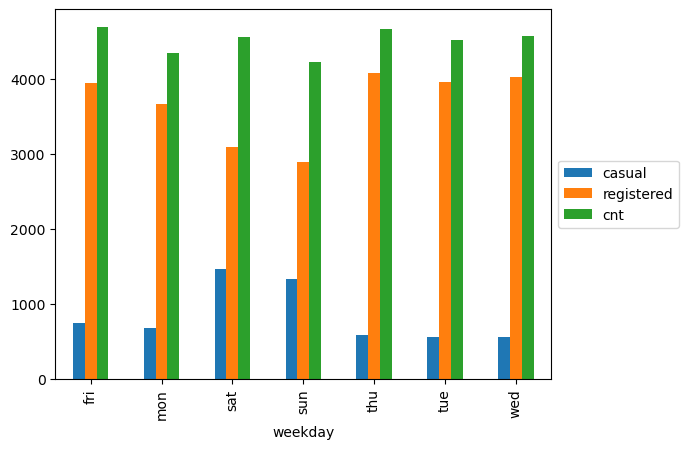

In [17]:
df.groupby('weekday')[['casual', 'registered', 'cnt']].mean().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Higher Casual rides on weekend/holidays compared to Higher Registered rides on weekdays/working days.
#### On Weekdays there are more registered users using bike share to commute to work
#### On weekends Casual rides increase due to people using bikeshare for leisure activities

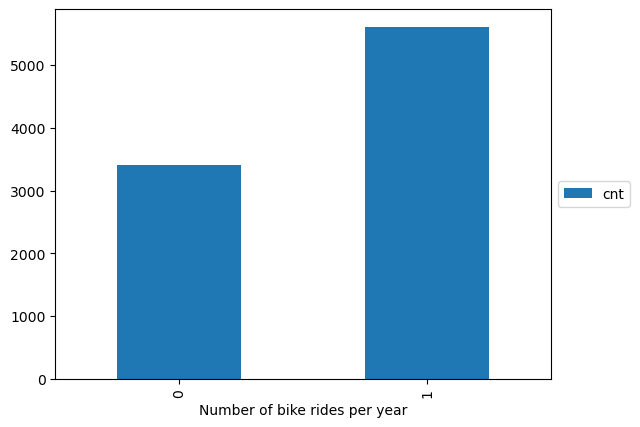

In [18]:
df.groupby('yr')['cnt'].mean().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of bike rides per year')
plt.show()

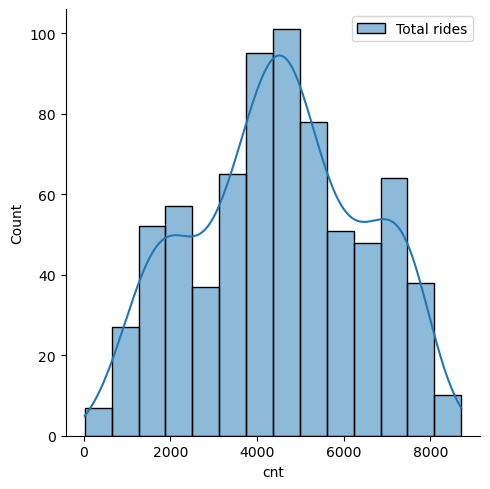

In [19]:
sns.displot(df.cnt, kde=True, label='Total rides')
plt.legend()
plt.show()

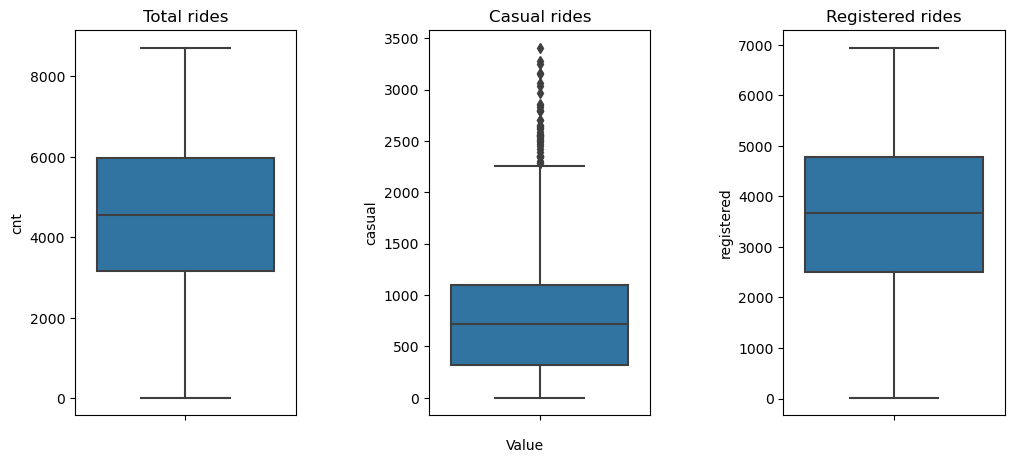

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Swap x and y axes
sns.boxplot(y=df.cnt, ax=axes[0])
axes[0].set_title('Total rides')

sns.boxplot(y=df.casual, ax=axes[1])
axes[1].set_title('Casual rides')

sns.boxplot(y=df.registered, ax=axes[2])
axes[2].set_title('Registered rides')

# Set common xlabel for all subplots
fig.text(0.5, 0.04, 'Value', ha='center')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Display the boxplots
plt.show()

#### The bike ride numbers closely follow normal distribution with median at around 4800

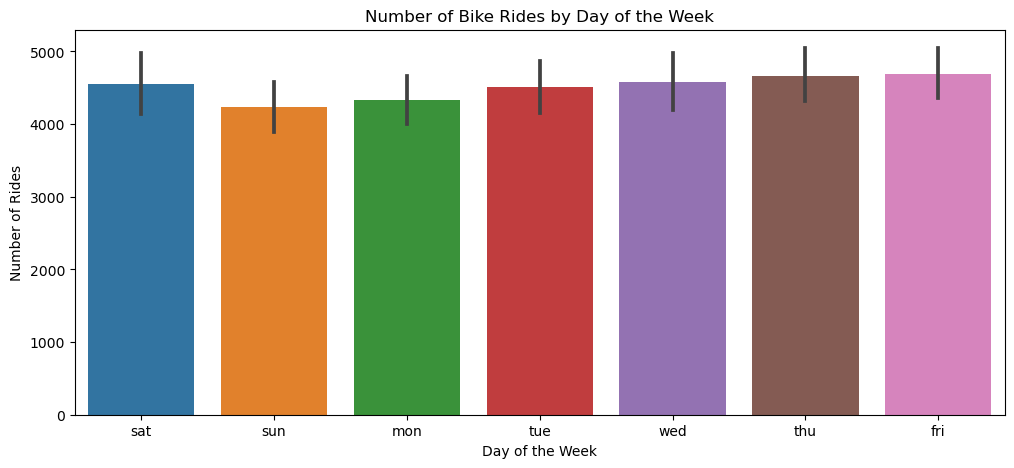

In [21]:
plt.figure(figsize=(12, 5))
sns.barplot(x='weekday', y=df.cnt, data=df)
plt.title('Number of Bike Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

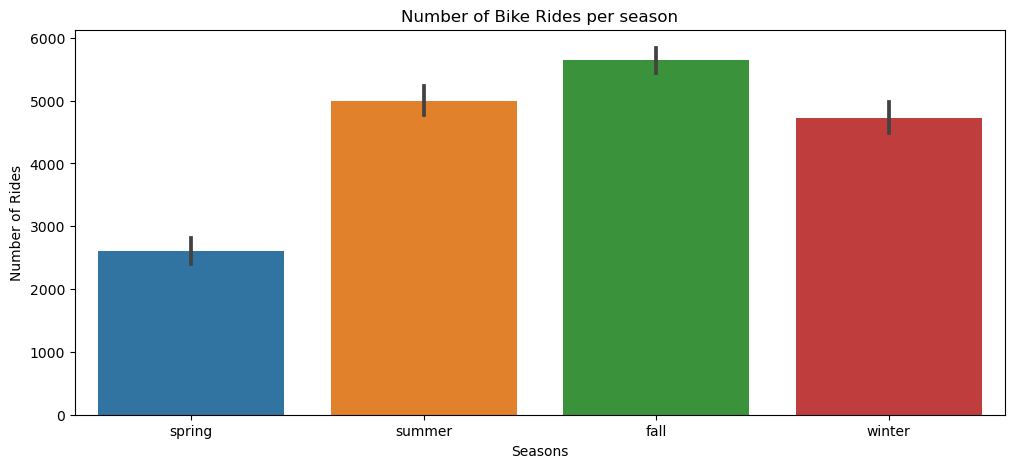

In [22]:
plt.figure(figsize=(12, 5))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Number of Bike Rides per season')
plt.xlabel('Seasons')
plt.ylabel('Number of Rides')
plt.show()

#### Most rides are seen during Fall, followed by Summer and winter but least during Spring

In [23]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


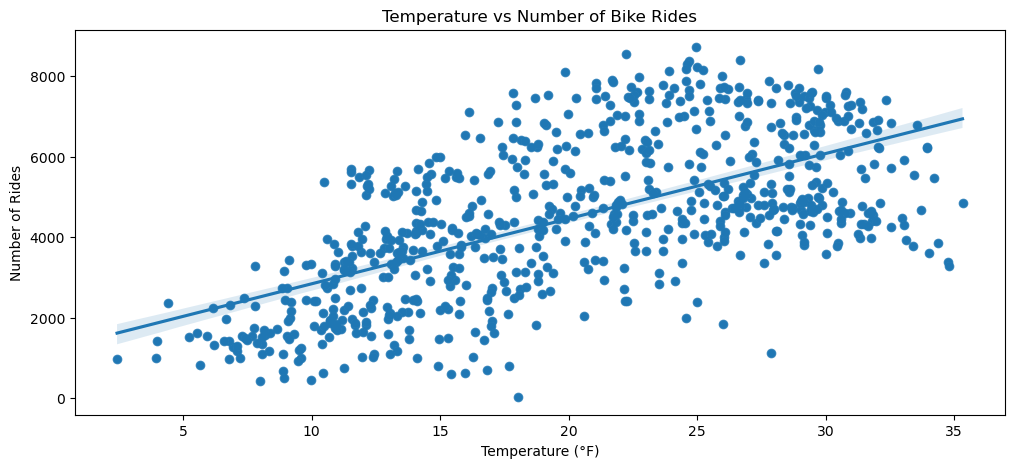

In [24]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='temp', y='cnt', data=df)
reg = sns.regplot(x='temp', y='cnt', data=df)
plt.title('Temperature vs Number of Bike Rides')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Rides')
plt.show()

#### There is a clear positive correlation between temperature and bike rides

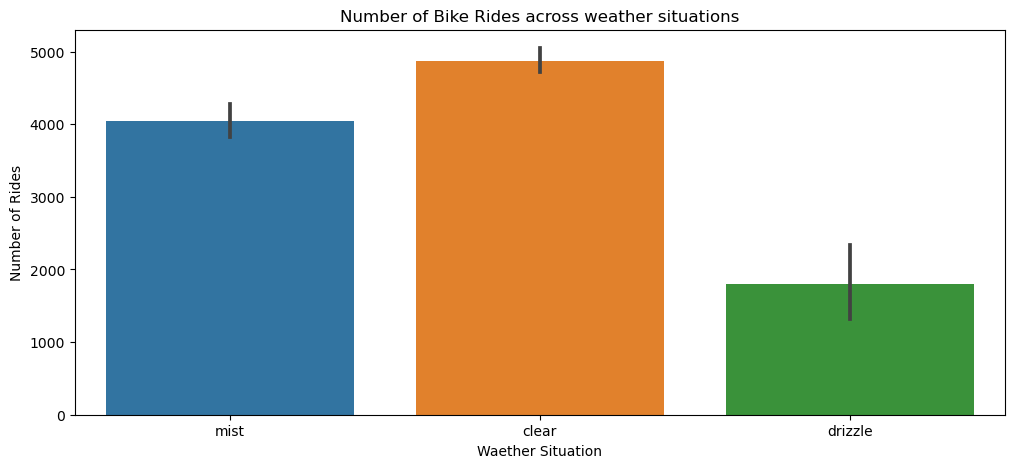

In [25]:
plt.figure(figsize=(12, 5))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Number of Bike Rides across weather situations')
plt.xlabel('Waether Situation')
plt.ylabel('Number of Rides')
plt.show()

#### There are lesser bike rides during light rainy weather

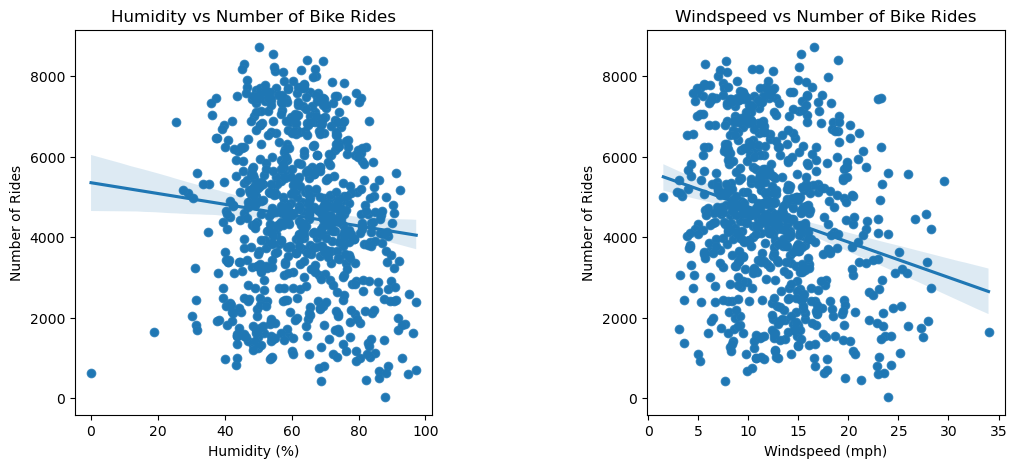

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create scatter plots of humidity, temperature, and windspeed against cnt
sns.scatterplot(x='hum', y='cnt', data=df, ax=axes[0])
sns.regplot(x='hum', y='cnt', data=df, ax=axes[0])
axes[0].set_title('Humidity vs Number of Bike Rides')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Number of Rides')



sns.scatterplot(x='windspeed', y='cnt', data=df, ax=axes[1])
sns.regplot(x='windspeed', y='cnt', data=df, ax=axes[1])
axes[1].set_title('Windspeed vs Number of Bike Rides')
axes[1].set_xlabel('Windspeed (mph)')
axes[1].set_ylabel('Number of Rides')


plt.subplots_adjust(wspace=0.6)
plt.show()

#### No direct correlation found between humidity and windspeed against Bike rides

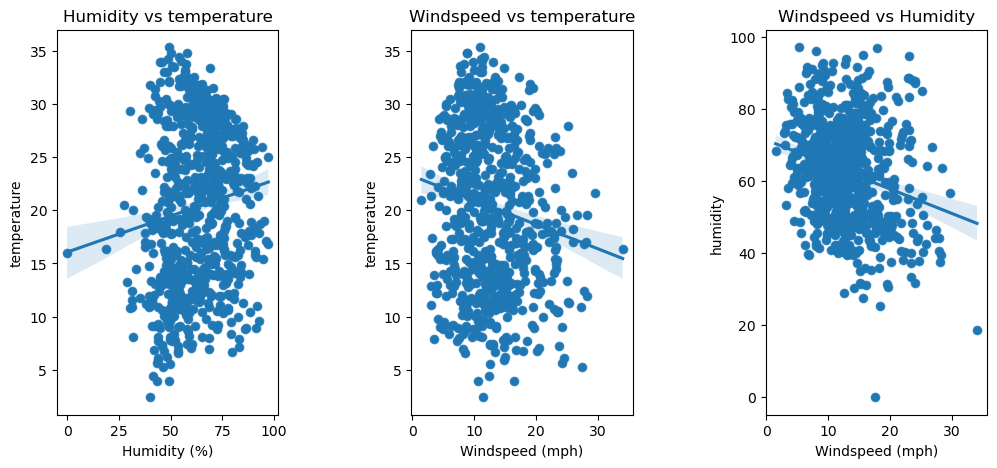

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Create scatter plots of humidity, temperature, and windspeed against cnt
sns.scatterplot(x='hum', y='temp', data=df, ax=axes[0])
sns.regplot(x='hum', y='temp', data=df, ax=axes[0])
axes[0].set_title('Humidity vs temperature')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('temperature')



sns.scatterplot(x='windspeed', y='temp', data=df, ax=axes[1])
sns.regplot(x='windspeed', y='temp', data=df, ax=axes[1])
axes[1].set_title('Windspeed vs temperature')
axes[1].set_xlabel('Windspeed (mph)')
axes[1].set_ylabel('temperature')


sns.scatterplot(x='windspeed', y='hum', data=df, ax=axes[2])
sns.regplot(x='windspeed', y='hum', data=df, ax=axes[2])
axes[2].set_title('Windspeed vs Humidity')
axes[2].set_xlabel('Windspeed (mph)')
axes[2].set_ylabel('humidity')


plt.subplots_adjust(wspace=0.6)
plt.show()

<Figure size 1600x3200 with 0 Axes>

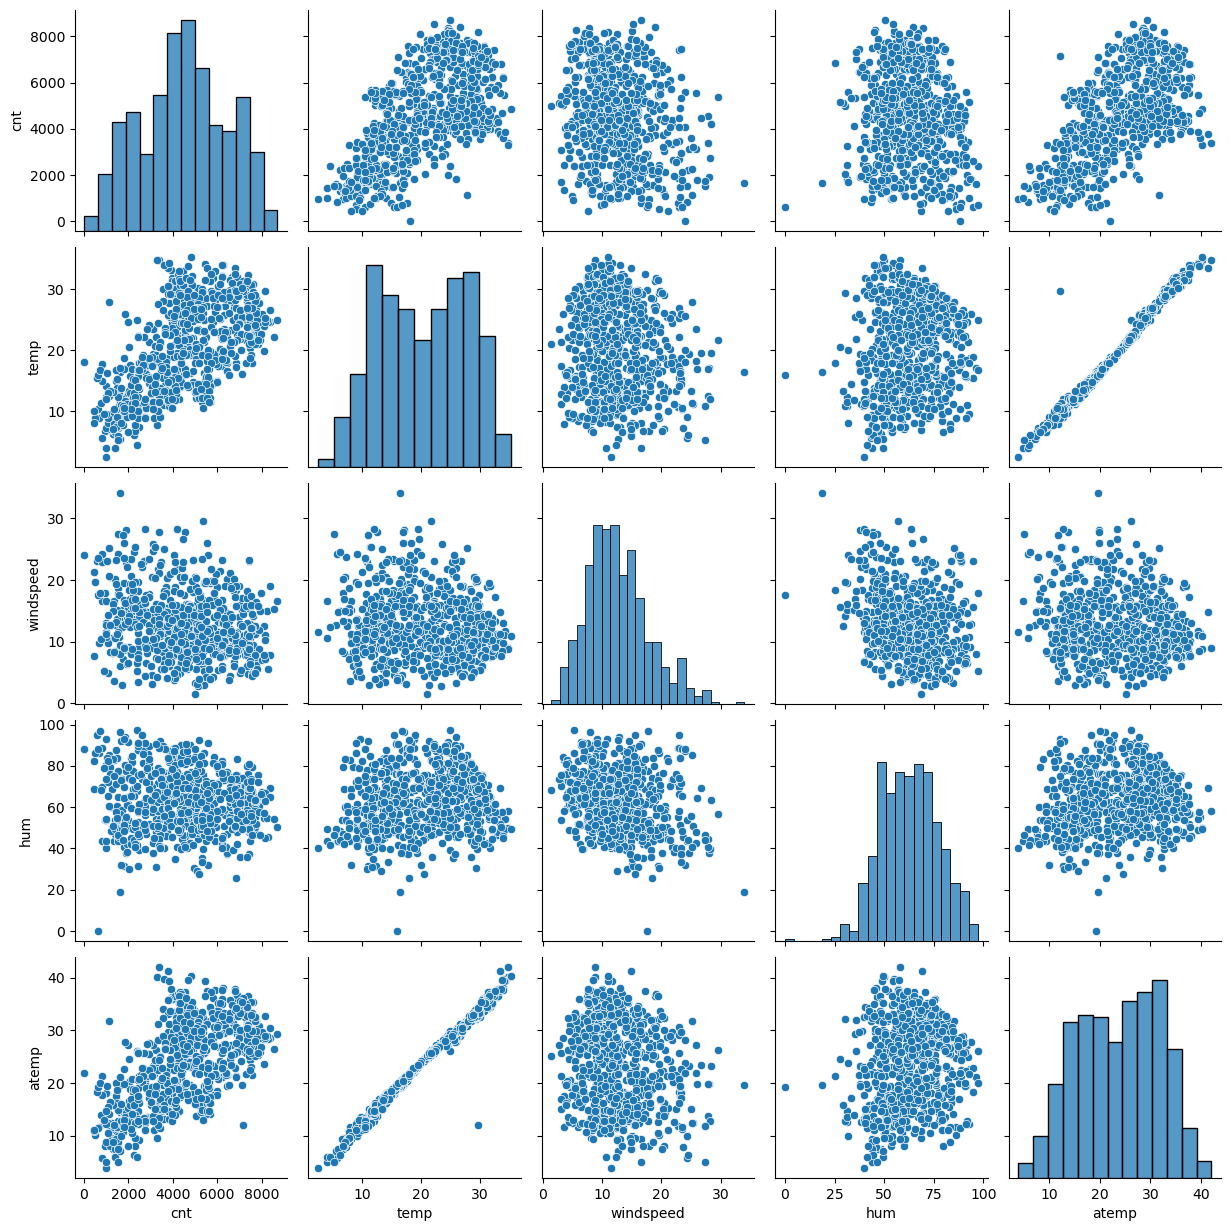

In [28]:
plt.figure(figsize = (16,32))
sns.pairplot(data=df[['cnt','temp','windspeed','hum','atemp']])
plt.show()

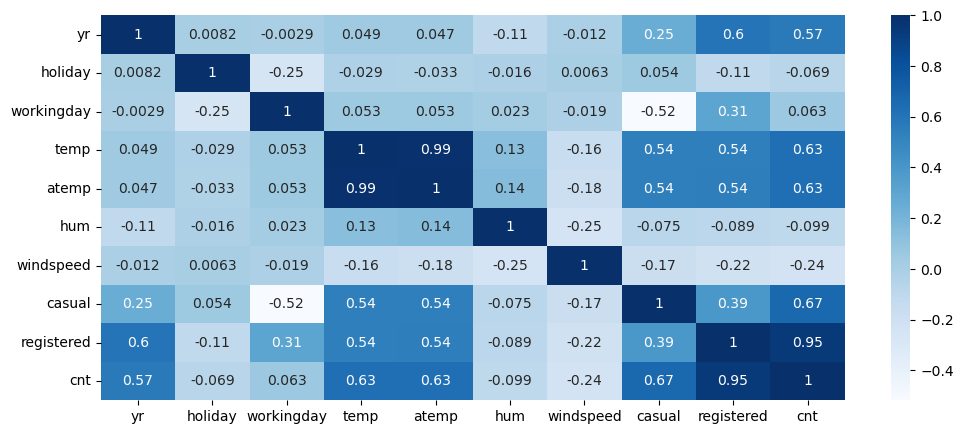

In [29]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### We see some clear correlation between the target and Predictors variables.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## Creating dummy variables for categorical variables

In [31]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)

In [32]:
df = pd.get_dummies(data=df,columns=["weathersit"])

In [33]:
df= df.drop(['casual','registered'], axis=1)

In [34]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [36]:
df.shape

(730, 31)

## Creating Train and Test datasets

In [134]:
# Split into train and test 
df_train, df_test=train_test_split(df,train_size=0.7,random_state=3)

In [135]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [136]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
270,0,0,1,26.035000,28.75790,84.8750,9.958143,3907,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
121,0,0,1,22.515847,26.64165,73.0000,12.291418,4401,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
238,0,0,0,27.880000,31.77780,85.0000,25.166339,1115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
592,1,0,1,29.485847,32.73440,51.9167,9.500332,7605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
590,1,0,1,29.793347,33.83895,68.6667,11.333586,6784,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Scaling the train dataset to normalize the continuous variables

In [137]:
scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [138]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.035294,0.666667,0.544442,0.511841,0.642048,0.344415,0.519372,0.252941,0.229412,0.268627,0.086275,0.088235,0.068627,0.096078,0.068627,0.086275,0.084314,0.078431,0.086275,0.103922,0.080392,0.149020,0.162745,0.135294,0.133333,0.139216,0.135294,0.643137,0.025490,0.331373
std,0.500352,0.184703,0.471867,0.231359,0.213488,0.145147,0.162247,0.226475,0.435124,0.420867,0.443681,0.281045,0.283915,0.253068,0.294988,0.253068,0.281045,0.278131,0.269113,0.281045,0.305458,0.272166,0.356457,0.369495,0.342373,0.340268,0.346511,0.342373,0.479544,0.157763,0.471169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344439,0.332644,0.536953,0.225964,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.538523,0.519376,0.638175,0.317308,0.525023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746847,0.686225,0.746572,0.433925,0.691584,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating reusable functions for calculation OLS and VIF

In [139]:
#VIF function
def GetVif(train_data):
    vif=pd.DataFrame()
    vif['features']=train_data.columns
    vif['VIF']= [variance_inflation_factor(train_data.values,i)for i in range(train_data.shape[1])]
    vif['VIF']= round(vif.VIF,2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

In [140]:
#OLS function
def LinRegModel(xTrainData,yTrainData):
    X_train_sm=sm.add_constant(xTrainData)
    lr=sm.OLS(yTrainData,X_train_sm)
    lr_model=lr.fit()
    return lr_model.summary()

### Splitting Train dataset into Target and Predictor | X_train and y_train

In [141]:
#Create X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [142]:
y_train.shape

(510,)

### Using RFE to check on the features significance and colinearity

In [143]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [144]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 13),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 9),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', False, 12),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 8),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_clear', True, 1),
 ('weathersit_drizzle', True, 1),
 ('weathersit_mist', True, 1)]

In [147]:
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Oct', 'mnth_Sep', 'weekday_sat',
       'weekday_sun', 'weathersit_clear', 'weathersit_drizzle',
       'weathersit_mist'],
      dtype='object')

In [148]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [163]:
X_train_rfe=X_train[cols]

In [164]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Oct,mnth_Sep,weekday_sat,weekday_sun,weathersit_clear,weathersit_drizzle,weathersit_mist
270,0,0,1,0.728915,0.872751,0.260245,0,1,0,1,0,0,0,0,1
121,0,0,1,0.620271,0.750643,0.332038,0,0,0,0,0,0,0,0,1
238,0,0,0,0.785874,0.874036,0.728193,0,0,0,0,1,0,0,0,1
592,1,0,1,0.835451,0.533848,0.246158,0,0,0,0,0,0,1,0,0
590,1,0,1,0.844944,0.706084,0.302566,0,0,0,0,0,0,1,0,0


### Checking 1st model

In [165]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.67e-186
Time:                        14:34:54   Log-Likelihood:                 498.05
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     496   BIC:                            -908.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1749      0.025      7.076      0.000       0.126       0.223
yr                     0.2354      0.008     28.281      0.000       0.219       0.252
holiday                0.0066      0.019      0.352      0.725      -0.030       0.044
workingday             0.0639      0.009      7.156      0.000       0.046       0.081
temp                   0.4006      0.030     13.410      0.000       0.342       0.459
hum                   -0.1871      0.039     -4.820      0.000      -0.263      -0.111
windspeed             -0.1606      0.028     -5.782      0.000      -0.215      -0.106
season_spring         -0.1352      0.016     -8.636      0.000      -0.166      -0.104
season_winter          0.0220      0.015      1.453      0.147      -0.008       0.052
mnth_Oct               0.0672      0.017      3.977      0.000       0.034       0.100
mnth_Sep               0.0711      0.016      4.457      0.000       0.040       0.102
weekday_sat            0.0797      0.011      7.072      0.000       0.058       0.102
weekday_sun            0.0247      0.012      2.076      0.038       0.001       0.048
weathersit_clear       0.1607      0.010     16.099      0.000       0.141       0.180
weathersit_drizzle    -0.0972      0.023     -4.191      0.000      -0.143      -0.052
weathersit_mist        0.1115      0.012      9.261      0.000       0.088       0.135
==============================================================================
Omnibus:                       84.696   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.108
Skew:                          -0.796   Prob(JB):                     1.62e-53
Kurtosis:                       5.984   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [166]:
GetVif(X_train_rfe)

,features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_sat,inf
11,weekday_sun,inf
12,weathersit_clear,inf
13,weathersit_drizzle,inf
14,weathersit_mist,inf
3,temp,2.85
6,season_spring,2.77
7,season_winter,2.69


### Dropping features to get better significance levels and lesser VIF

In [167]:
X_train_rfe=X_train_rfe.drop('holiday',axis=1)

In [168]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.67e-186
Time:                        14:35:06   Log-Likelihood:                 498.05
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     496   BIC:                            -908.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1798      0.034      5.341      0.000       0.114       0.246
yr                     0.2354      0.008     28.281      0.000       0.219       0.252
workingday             0.0573      0.022      2.551      0.011       0.013       0.101
temp                   0.4006      0.030     13.410      0.000       0.342       0.459
hum                   -0.1871      0.039     -4.820      0.000      -0.263      -0.111
windspeed             -0.1606      0.028     -5.782      0.000      -0.215      -0.106
season_spring         -0.1352      0.016     -8.636      0.000      -0.166      -0.104
season_winter          0.0220      0.015      1.453      0.147      -0.008       0.052
mnth_Oct               0.0672      0.017      3.977      0.000       0.034       0.100
mnth_Sep               0.0711      0.016      4.457      0.000       0.040       0.102
weekday_sat            0.0731      0.024      3.036      0.003       0.026       0.120
weekday_sun            0.0180      0.025      0.734      0.463      -0.030       0.066
weathersit_clear       0.1623      0.012     13.940      0.000       0.139       0.185
weathersit_drizzle    -0.0956      0.025     -3.825      0.000      -0.145      -0.046
weathersit_mist        0.1131      0.014      8.057      0.000       0.086       0.141
==============================================================================
Omnibus:                       84.696   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.108
Skew:                          -0.796   Prob(JB):                     1.62e-53
Kurtosis:                       5.984   Cond. No.                     9.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [170]:
GetVif(X_train_rfe)

,features,VIF
11,weathersit_clear,63.70
13,weathersit_mist,39.50
1,workingday,6.69
9,weekday_sat,4.72
12,weathersit_drizzle,4.52
10,weekday_sun,4.21
2,temp,2.85
5,season_spring,2.77
6,season_winter,2.69
3,hum,1.89


In [171]:
X_train_rfe=X_train_rfe.drop('weekday_sun',axis=1)

In [172]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.34e-187
Time:                        14:35:36   Log-Likelihood:                 497.77
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     497   BIC:                            -914.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1912      0.030      6.401      0.000       0.133       0.250
yr                     0.2352      0.008     28.284      0.000       0.219       0.252
workingday             0.0430      0.011      3.837      0.000       0.021       0.065
temp                   0.4000      0.030     13.401      0.000       0.341       0.459
hum                   -0.1869      0.039     -4.818      0.000      -0.263      -0.111
windspeed             -0.1615      0.028     -5.823      0.000      -0.216      -0.107
season_spring         -0.1358      0.016     -8.690      0.000      -0.167      -0.105
season_winter          0.0219      0.015      1.449      0.148      -0.008       0.052
mnth_Oct               0.0670      0.017      3.966      0.000       0.034       0.100
mnth_Sep               0.0712      0.016      4.463      0.000       0.040       0.103
weekday_sat            0.0588      0.014      4.131      0.000       0.031       0.087
weathersit_clear       0.1660      0.010     15.860      0.000       0.145       0.187
weathersit_drizzle    -0.0916      0.024     -3.757      0.000      -0.139      -0.044
weathersit_mist        0.1168      0.013      8.899      0.000       0.091       0.143
==============================================================================
Omnibus:                       84.286   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.043
Skew:                          -0.793   Prob(JB):                     4.55e-53
Kurtosis:                       5.971   Cond. No.                     9.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [173]:
GetVif(X_train_rfe)

,features,VIF
10,weathersit_clear,47.42
12,weathersit_mist,31.20
11,weathersit_drizzle,3.86
2,temp,2.85
5,season_spring,2.76
6,season_winter,2.69
3,hum,1.89
1,workingday,1.67
9,weekday_sat,1.65
7,mnth_Oct,1.59


In [174]:
X_train_rfe=X_train_rfe.drop('season_winter',axis=1)

In [175]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.3
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.26e-188
Time:                        14:36:18   Log-Likelihood:                 496.69
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2042      0.029      7.154      0.000       0.148       0.260
yr                     0.2362      0.008     28.462      0.000       0.220       0.253
workingday             0.0434      0.011      3.874      0.000       0.021       0.065
temp                   0.3727      0.023     16.074      0.000       0.327       0.418
hum                   -0.1799      0.039     -4.669      0.000      -0.256      -0.104
windspeed             -0.1646      0.028     -5.948      0.000      -0.219      -0.110
season_spring         -0.1497      0.012    -12.103      0.000      -0.174      -0.125
mnth_Oct               0.0803      0.014      5.659      0.000       0.052       0.108
mnth_Sep               0.0725      0.016      4.544      0.000       0.041       0.104
weekday_sat            0.0586      0.014      4.108      0.000       0.031       0.087
weathersit_clear       0.1723      0.010     18.056      0.000       0.154       0.191
weathersit_drizzle    -0.0896      0.024     -3.679      0.000      -0.138      -0.042
weathersit_mist        0.1215      0.013      9.548      0.000       0.096       0.147
==============================================================================
Omnibus:                       83.376   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.842
Skew:                          -0.787   Prob(JB):                     3.72e-52
Kurtosis:                       5.944   Cond. No.                     9.19e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [176]:
GetVif(X_train_rfe)

,features,VIF
9,weathersit_clear,40.66
11,weathersit_mist,28.26
10,weathersit_drizzle,3.70
3,hum,1.86
5,season_spring,1.72
2,temp,1.71
1,workingday,1.67
8,weekday_sat,1.65
4,windspeed,1.20
6,mnth_Oct,1.12


In [178]:
X_train_rfe=X_train_rfe.drop('weathersit_clear',axis=1)

In [179]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.3
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.26e-188
Time:                        14:43:36   Log-Likelihood:                 496.69
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3765      0.033     11.565      0.000       0.313       0.440
yr                     0.2362      0.008     28.462      0.000       0.220       0.253
workingday             0.0434      0.011      3.874      0.000       0.021       0.065
temp                   0.3727      0.023     16.074      0.000       0.327       0.418
hum                   -0.1799      0.039     -4.669      0.000      -0.256      -0.104
windspeed             -0.1646      0.028     -5.948      0.000      -0.219      -0.110
season_spring         -0.1497      0.012    -12.103      0.000      -0.174      -0.125
mnth_Oct               0.0803      0.014      5.659      0.000       0.052       0.108
mnth_Sep               0.0725      0.016      4.544      0.000       0.041       0.104
weekday_sat            0.0586      0.014      4.108      0.000       0.031       0.087
weathersit_drizzle    -0.2620      0.029     -9.004      0.000      -0.319      -0.205
weathersit_mist       -0.0508      0.011     -4.649      0.000      -0.072      -0.029
==============================================================================
Omnibus:                       83.376   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.842
Skew:                          -0.787   Prob(JB):                     3.72e-52
Kurtosis:                       5.944   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
GetVif(X_train_rfe)

,features,VIF
3,hum,15.63
2,temp,9.59
4,windspeed,4.82
1,workingday,4.56
10,weathersit_mist,2.07
0,yr,2.01
5,season_spring,2.00
8,weekday_sat,1.88
6,mnth_Oct,1.24
7,mnth_Sep,1.21


In [181]:
X_train_rfe=X_train_rfe.drop('hum',axis=1)

In [182]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.10e-184
Time:                        14:44:46   Log-Likelihood:                 485.77
No. Observations:                 510   AIC:                            -949.5
Df Residuals:                     499   BIC:                            -903.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2595      0.021     12.236      0.000       0.218       0.301
yr                     0.2409      0.008     28.660      0.000       0.224       0.257
workingday             0.0473      0.011      4.142      0.000       0.025       0.070
temp                   0.3615      0.024     15.357      0.000       0.315       0.408
windspeed             -0.1240      0.027     -4.624      0.000      -0.177      -0.071
season_spring         -0.1460      0.013    -11.593      0.000      -0.171      -0.121
mnth_Oct               0.0723      0.014      5.033      0.000       0.044       0.101
mnth_Sep               0.0608      0.016      3.781      0.000       0.029       0.092
weekday_sat            0.0617      0.015      4.246      0.000       0.033       0.090
weathersit_drizzle    -0.3145      0.027    -11.482      0.000      -0.368      -0.261
weathersit_mist       -0.0800      0.009     -8.753      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       85.418   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.358
Skew:                          -0.812   Prob(JB):                     1.74e-52
Kurtosis:                       5.929   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
GetVif(X_train_rfe)

,features,VIF
2,temp,5.25
3,windspeed,4.70
1,workingday,4.27
0,yr,2.00
7,weekday_sat,1.82
4,season_spring,1.74
9,weathersit_mist,1.54
6,mnth_Sep,1.19
5,mnth_Oct,1.16
8,weathersit_drizzle,1.09


In [184]:
X_train_rfe=X_train_rfe.drop('temp',axis=1)

In [185]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     166.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.81e-144
Time:                        14:53:24   Log-Likelihood:                 387.07
No. Observations:                 510   AIC:                            -754.1
Df Residuals:                     500   BIC:                            -711.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4959      0.018     28.043      0.000       0.461       0.531
yr                     0.2452      0.010     24.068      0.000       0.225       0.265
workingday             0.0537      0.014      3.885      0.000       0.027       0.081
windspeed             -0.1544      0.032     -4.763      0.000      -0.218      -0.091
season_spring         -0.2598      0.012    -21.034      0.000      -0.284      -0.236
mnth_Oct               0.0391      0.017      2.272      0.024       0.005       0.073
mnth_Sep               0.0914      0.019      4.730      0.000       0.053       0.129
weekday_sat            0.0699      0.018      3.970      0.000       0.035       0.104
weathersit_drizzle    -0.3561      0.033    -10.777      0.000      -0.421      -0.291
weathersit_mist       -0.0985      0.011     -8.958      0.000      -0.120      -0.077
==============================================================================
Omnibus:                       45.393   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.966
Skew:                          -0.486   Prob(JB):                     4.38e-23
Kurtosis:                       4.975   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
GetVif(X_train_rfe)

,features,VIF
2,windspeed,3.84
1,workingday,3.26
0,yr,1.87
6,weekday_sat,1.59
8,weathersit_mist,1.54
3,season_spring,1.48
4,mnth_Oct,1.16
5,mnth_Sep,1.13
7,weathersit_drizzle,1.08


In [187]:
X_train_rfe['temp']=X_train['temp']

In [189]:
X_train_rfe=X_train_rfe.drop('mnth_Oct',axis=1)

In [190]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.49e-180
Time:                        15:00:31   Log-Likelihood:                 473.14
No. Observations:                 510   AIC:                            -926.3
Df Residuals:                     500   BIC:                            -883.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2843      0.021     13.457      0.000       0.243       0.326
yr                     0.2405      0.009     27.937      0.000       0.224       0.257
workingday             0.0469      0.012      4.014      0.000       0.024       0.070
windspeed             -0.1339      0.027     -4.889      0.000      -0.188      -0.080
season_spring         -0.1625      0.012    -13.044      0.000      -0.187      -0.138
mnth_Sep               0.0501      0.016      3.070      0.002       0.018       0.082
weekday_sat            0.0625      0.015      4.202      0.000       0.033       0.092
weathersit_drizzle    -0.3087      0.028    -11.016      0.000      -0.364      -0.254
weathersit_mist       -0.0768      0.009     -8.226      0.000      -0.095      -0.058
temp                   0.3437      0.024     14.422      0.000       0.297       0.390
==============================================================================
Omnibus:                       54.393   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.577
Skew:                          -0.599   Prob(JB):                     4.85e-26
Kurtosis:                       5.012   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
GetVif(X_train_rfe)

,features,VIF
8,temp,5.25
2,windspeed,4.69
1,workingday,4.23
0,yr,2.00
5,weekday_sat,1.81
3,season_spring,1.69
7,weathersit_mist,1.52
4,mnth_Sep,1.17
6,weathersit_drizzle,1.09


In [192]:
X_train_rfe['mnth_Oct']=X_train['mnth_Oct']

In [193]:
X_train_rfe=X_train_rfe.drop('mnth_Sep',axis=1)

In [194]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          7.43e-183
Time:                        15:03:03   Log-Likelihood:                 478.56
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     500   BIC:                            -894.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2621      0.021     12.206      0.000       0.220       0.304
yr                     0.2397      0.009     28.161      0.000       0.223       0.256
workingday             0.0466      0.012      4.034      0.000       0.024       0.069
windspeed             -0.1311      0.027     -4.837      0.000      -0.184      -0.078
season_spring         -0.1498      0.013    -11.771      0.000      -0.175      -0.125
weekday_sat            0.0611      0.015      4.151      0.000       0.032       0.090
weathersit_drizzle    -0.3017      0.028    -10.956      0.000      -0.356      -0.248
weathersit_mist       -0.0765      0.009     -8.297      0.000      -0.095      -0.058
temp                   0.3725      0.024     15.743      0.000       0.326       0.419
mnth_Oct               0.0651      0.014      4.513      0.000       0.037       0.094
==============================================================================
Omnibus:                       78.627   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.056
Skew:                          -0.749   Prob(JB):                     2.71e-48
Kurtosis:                       5.840   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
GetVif(X_train_rfe)

,features,VIF
7,temp,5.01
2,windspeed,4.68
1,workingday,4.27
0,yr,2.00
4,weekday_sat,1.82
3,season_spring,1.73
6,weathersit_mist,1.52
8,mnth_Oct,1.14
5,weathersit_drizzle,1.08


In [196]:
X_train_rfe=X_train_rfe.drop('workingday',axis=1)

In [197]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.25e-180
Time:                        15:05:02   Log-Likelihood:                 470.40
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2947      0.020     14.591      0.000       0.255       0.334
yr                     0.2403      0.009     27.814      0.000       0.223       0.257
windspeed             -0.1277      0.027     -4.645      0.000      -0.182      -0.074
season_spring         -0.1498      0.013    -11.601      0.000      -0.175      -0.124
weekday_sat            0.0240      0.012      2.059      0.040       0.001       0.047
weathersit_drizzle    -0.2960      0.028    -10.602      0.000      -0.351      -0.241
weathersit_mist       -0.0730      0.009     -7.838      0.000      -0.091      -0.055
temp                   0.3759      0.024     15.658      0.000       0.329       0.423
mnth_Oct               0.0649      0.015      4.428      0.000       0.036       0.094
==============================================================================
Omnibus:                       77.148   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.288
Skew:                          -0.776   Prob(JB):                     4.78e-42
Kurtosis:                       5.559   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
GetVif(X_train_rfe)

,features,VIF
1,windspeed,4.39
6,temp,3.77
0,yr,1.98
2,season_spring,1.64
5,weathersit_mist,1.48
3,weekday_sat,1.20
7,mnth_Oct,1.13
4,weathersit_drizzle,1.07


In [199]:
X_train_rfe=X_train_rfe.drop('windspeed',axis=1)

In [200]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     308.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.58e-177
Time:                        15:13:41   Log-Likelihood:                 459.64
No. Observations:                 510   AIC:                            -903.3
Df Residuals:                     502   BIC:                            -869.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2470      0.018     13.922      0.000       0.212       0.282
yr                     0.2412      0.009     27.378      0.000       0.224       0.259
season_spring         -0.1552      0.013    -11.829      0.000      -0.181      -0.129
weekday_sat            0.0207      0.012      1.738      0.083      -0.003       0.044
weathersit_drizzle    -0.3141      0.028    -11.135      0.000      -0.369      -0.259
weathersit_mist       -0.0724      0.010     -7.622      0.000      -0.091      -0.054
temp                   0.3851      0.024     15.776      0.000       0.337       0.433
mnth_Oct               0.0693      0.015      4.645      0.000       0.040       0.099
==============================================================================
Omnibus:                       84.619   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.890
Skew:                          -0.813   Prob(JB):                     1.20e-50
Kurtosis:                       5.859   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
GetVif(X_train_rfe)

,features,VIF
5,temp,2.17
0,yr,1.96
4,weathersit_mist,1.45
1,season_spring,1.23
2,weekday_sat,1.18
6,mnth_Oct,1.13
3,weathersit_drizzle,1.03


In [202]:
X_train_rfe['workingday']=X_train['workingday']

In [203]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          3.84e-179
Time:                        15:15:04   Log-Likelihood:                 466.90
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     501   BIC:                            -877.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2144      0.019     10.998      0.000       0.176       0.253
yr                     0.2407      0.009     27.677      0.000       0.224       0.258
season_spring         -0.1553      0.013    -11.993      0.000      -0.181      -0.130
weekday_sat            0.0563      0.015      3.749      0.000       0.027       0.086
weathersit_drizzle    -0.3200      0.028    -11.479      0.000      -0.375      -0.265
weathersit_mist       -0.0757      0.009     -8.042      0.000      -0.094      -0.057
temp                   0.3821      0.024     15.852      0.000       0.335       0.429
mnth_Oct               0.0697      0.015      4.732      0.000       0.041       0.099
workingday             0.0449      0.012      3.803      0.000       0.022       0.068
==============================================================================
Omnibus:                       85.910   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.435
Skew:                          -0.784   Prob(JB):                     3.79e-58
Kurtosis:                       6.160   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
GetVif(X_train_rfe)

,features,VIF
5,temp,4.11
7,workingday,4.01
0,yr,1.99
2,weekday_sat,1.72
4,weathersit_mist,1.51
1,season_spring,1.44
6,mnth_Oct,1.14
3,weathersit_drizzle,1.04


### Added columns dropped in previous steps 1 at a time to see effects on RSquare, PValue, VIF and coefficients, and came to the final model of the columns ['temp', 'workingday', 'yr','weekday_sat','weathersit_mist', 'season_spring','mnth_Oct' 'weathersit_drizzle'] for a proper fit with Rsquare of 80+ , Significant Pvalues, and VIF in acceptable range

In [205]:
X_train_rfe.columns

Index(['yr', 'season_spring', 'weekday_sat', 'weathersit_drizzle',
       'weathersit_mist', 'temp', 'mnth_Oct', 'workingday'],
      dtype='object')

## Final Model

In [206]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          3.84e-179
Time:                        15:21:42   Log-Likelihood:                 466.90
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     501   BIC:                            -877.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2144      0.019     10.998      0.000       0.176       0.253
yr                     0.2407      0.009     27.677      0.000       0.224       0.258
season_spring         -0.1553      0.013    -11.993      0.000      -0.181      -0.130
weekday_sat            0.0563      0.015      3.749      0.000       0.027       0.086
weathersit_drizzle    -0.3200      0.028    -11.479      0.000      -0.375      -0.265
weathersit_mist       -0.0757      0.009     -8.042      0.000      -0.094      -0.057
temp                   0.3821      0.024     15.852      0.000       0.335       0.429
mnth_Oct               0.0697      0.015      4.732      0.000       0.041       0.099
workingday             0.0449      0.012      3.803      0.000       0.022       0.068
==============================================================================
Omnibus:                       85.910   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.435
Skew:                          -0.784   Prob(JB):                     3.79e-58
Kurtosis:                       6.160   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
GetVif(X_train_rfe)

,features,VIF
5,temp,4.11
7,workingday,4.01
0,yr,1.99
2,weekday_sat,1.72
4,weathersit_mist,1.51
1,season_spring,1.44
6,mnth_Oct,1.14
3,weathersit_drizzle,1.04


### Residual

In [208]:
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [209]:
y_train_pred=lr_model.predict(X_train_sm)

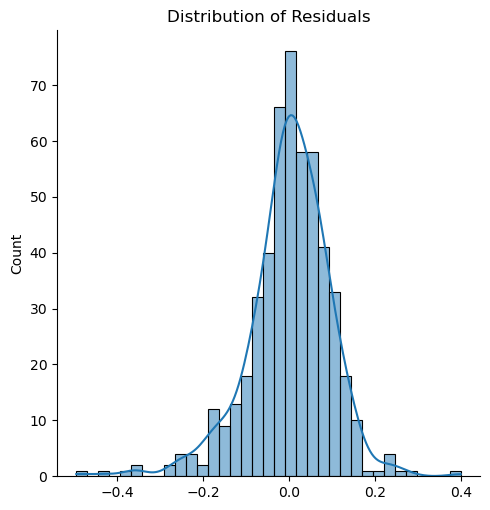

In [210]:
res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.title('Distribution of Residuals')
plt.show()

### Plotting a QQ Plot for Train Dataset

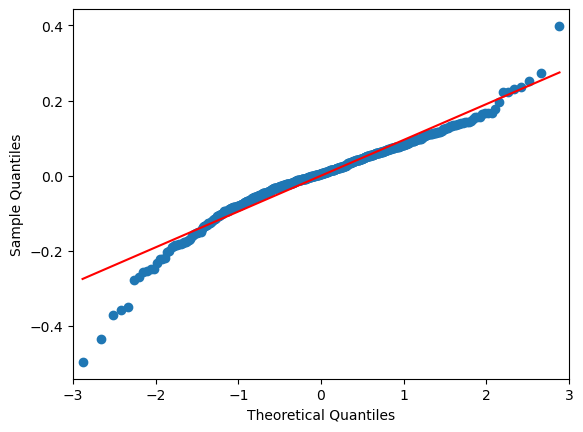

In [211]:
from statsmodels.api import qqplot

sm.qqplot(res, line='r')
plt.show()

## Predict model on Test Dataset


In [212]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [213]:
y_test=df_test.pop('cnt')
X_test=df_test

In [214]:
cols_test=X_train_rfe.columns

In [215]:
X_test_sm=X_test[cols_test]
X_test_sm= sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,season_spring,weekday_sat,weathersit_drizzle,weathersit_mist,temp,mnth_Oct,workingday
175,1.0,0,0,1,0,0,0.804861,0,0
306,1.0,0,0,0,0,0,0.442008,0,1
631,1.0,1,0,0,0,0,0.575969,0,1
107,1.0,0,0,0,0,0,0.573859,0,1
339,1.0,0,0,0,1,0,0.510571,0,1


In [216]:
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

175    0.578172
306    0.428170
631    0.720050
107    0.478546
339    0.134362
         ...   
327    0.366323
569    0.834505
596    0.703148
323    0.334106
336    0.386742
Length: 220, dtype: float64

### QQ Plot for Test Dataset

In [217]:
res_test= y_test-y_test_pred

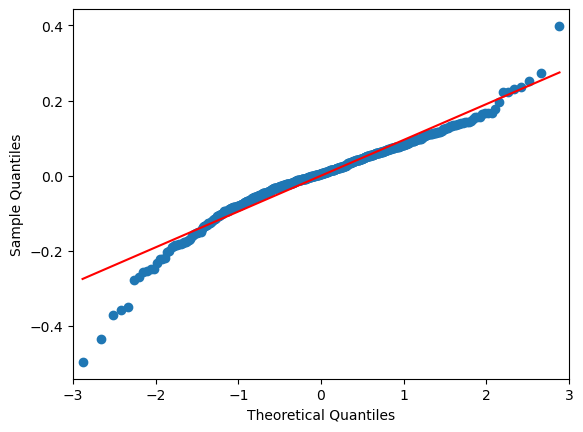

In [218]:
sm.qqplot(res, line='r')
plt.show()

### Calculating R2 Score

In [220]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.8005211483809951

### R2 score of Test Dataset is 0.800 and R2 Score of Train Dataset is 0.817. We can clearly say that the model is Accurate

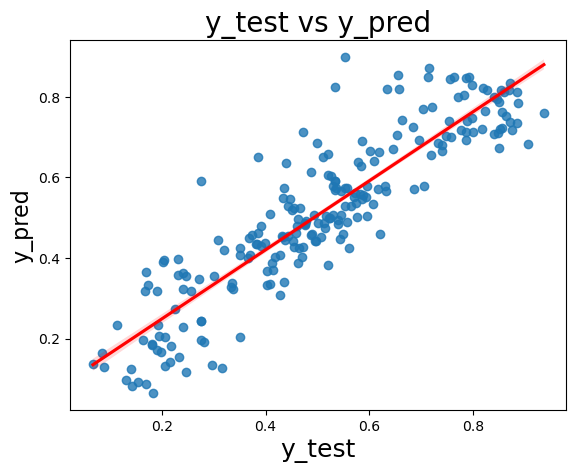

In [222]:
# Visualizing the best fit line 
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### We can see that the equation of our best fittline is:

### Count = 0.2144 + 0.2407 * Year - 0.1553 * Season_Spring + 0.0563 * Saturday - 0.3200 * Weathersit_Drizzle - 0.0757 * Weathersit_Mist + 0.3821 * Temperature + 0.0697 * October + 0.0449 * Workingday